In [52]:
import pandas  as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
%matplotlib inline
import numpy as np

In [45]:
data = pd.read_csv('pax_local_all_agreements_data.csv')

In [46]:
data['year'] = data['Dat'].apply(lambda x:int(x[:4]))

In [54]:
data['gdp'] = data['gdp'].apply(lambda x:0 if pd.isna(x) else int(str(x).replace(",","")))

In [47]:
data.head()

,Con,gdp,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,Lgt,N_characters,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO,Loc1GWNO,Loc2GWNO,UcdpCon,UcdpAgr,PamAgr,CowWar,PT_FSP,PT_ISP,PT_IPP,PT_UTE,LinkNatProcess,LocaleName,LocaleNat,LatDec,LongDec,Mediator,MedCentState,MedRegState,MedLocState,MedLocArmed,MedReDomEld,MedLocCivSoc,MedIntActor,MedOtherUnclear,CentState,RegState,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover,year
0,Bosnia and Herzegovina/Yugoslavia (former),NaN,Government/territory,125,Bosnia peace process,Europe and Eurasia,1210,1,Decisions on Mostar of 12 February 1997,1997/2/12,Multiparty signed/agreed,3,7696,Imp,ExtSub,"President Izetbegovic, President Zubak, Co-Cha...",The meeting was chaired by the Principal Deput...,"Page 1, Untitled preamble\r\nThe participants ...",BIH,NaN,346,NaN,398,NaN,NaN,215.0,1,0,0,0,1.0,Mostar,City,43.344127,17.810621,The meeting was chaired by the Principal Deput...,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,1,1997
1,Bosnia and Herzegovina/Yugoslavia (former),NaN,Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1644,1,Agreement on the disarmament of the able-bodie...,1995/7/24,Multiparty signed/agreed,1,2955,Cea,Rel,Rajko KUSIC; Hamdija TORLAK\r\n,UNPROFOR representative Semjon DUDNJIK \r\nCer...,NaN,BIH,NaN,346,NaN,389,NaN,NaN,215.0,0,1,0,0,1.0,Zepa,Smaller,43.953946,19.132594,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1995
2,Bosnia and Herzegovina/Yugoslavia (former),NaN,Government/territory,125,Bosnia peace process,Europe and Eurasia,1850,1,Agreement,1994/3/4,Multiparty signed/agreed,1,366,Pre,PreOth,On behalf of BiH [see PDF for signature]\r\nOn...,"Witness, UNPROFOR [unsigned]\r\n",NaN,BIH,NaN,346,NaN,398,NaN,NaN,215.0,0,0,0,1,0.0,Left bank of Mostar,Smaller,43.340005,17.814459,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1994
3,Bosnia and Herzegovina/Yugoslavia (former),NaN,Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1297,1,Declaration,1993/10/22,Multiparty signed/agreed,3,4905,Imp,ImpMod,PRESIDENT OF THE REPUBLIC OF SRPSKA Dr Radovan...,"Witness to the agreement achieved, and assumin...","Page 1, 1. \r\nThe Republic of Srpska recogniz...",BIH,NaN,346,NaN,397,NaN,NaN,215.0,0,0,1,0,0.0,Western Bosnia,Region,44.812905,15.870652,Listed in the agreement as 'Witness to the agr...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1993
4,Bosnia and Herzegovina/Yugoslavia (former),NaN,Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1569,1,Joint Statement,1993/10/21,Multiparty signed/agreed,2,2542,Cea,Ceas,President of the Croatian Republic of Herceg B...,NaN,"Page 1, Untitled Preamble\r\nAccepting the pri...",BIH,NaN,346,NaN,397,NaN,NaN,215.0,0,0,1,0,0.0,Western Bosnia,Region,44.812905,15.870652,NaN,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1993


In [10]:
data.PT_IPP.value_counts()

analys1 = analysis_data[['Status','year']].groupby('year').count().reset_index()
ax1 = sns.barplot(analys1['year'].to_list(),analys1['Status'].to_list())
ax1.set_xlabel('year')
ax1.set_ylabel('Status')
sns.lineplot(x="year", y="Status", data=analys1, ci=None)

0    214
1     72
Name: PT_IPP, dtype: int64

Text(0, 0.5, 'The mean of MedCentState')

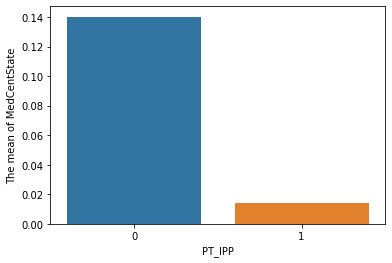

In [29]:
###看gdp与调解人类型
tmp2 = data.groupby("PT_IPP").MedCentState.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedCentState'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedCentState")

In [30]:
tmp2

,PT_IPP,MedCentState
0,0,0.140187
1,1,0.013889


Text(0, 0.5, 'The mean of MedRegState')

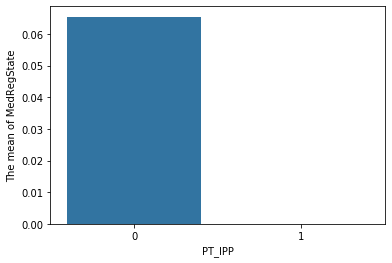

In [31]:
tmp2 = data.groupby("PT_IPP").MedRegState.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedRegState'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedRegState")

In [32]:
tmp2

,PT_IPP,MedRegState
0,0,0.065421
1,1,0.000000


Text(0, 0.5, 'The mean of MedOtherUnclear')

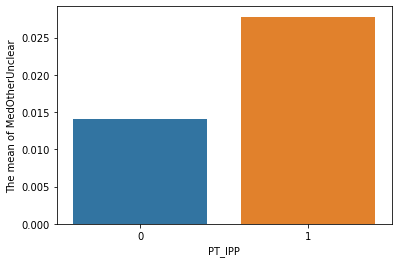

In [43]:
tmp2 = data.groupby("PT_IPP").MedOtherUnclear.mean().reset_index()
ax1 = sns.barplot(tmp2['PT_IPP'].to_list(),tmp2['MedOtherUnclear'].to_list())
ax1.set_xlabel("PT_IPP")
ax1.set_ylabel("The mean of MedOtherUnclear")

In [44]:
tmp2

,PT_IPP,MedOtherUnclear
0,0,0.014019
1,1,0.027778


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 57 columns):
Con                286 non-null object
gdp                32 non-null object
Contp              286 non-null object
PP                 286 non-null int64
PPName             286 non-null object
Reg                286 non-null object
AgtId              286 non-null int64
Ver                286 non-null int64
Agt                286 non-null object
Dat                286 non-null object
Status             286 non-null object
Lgt                286 non-null int64
N_characters       286 non-null int64
Stage              286 non-null object
StageSub           280 non-null object
Part               283 non-null object
ThrdPart           145 non-null object
OthAgr             70 non-null object
Loc1ISO            286 non-null object
Loc2ISO            14 non-null object
Loc1GWNO           286 non-null int64
Loc2GWNO           14 non-null float64
UcdpCon            214 non-null object
UcdpAgr

In [70]:
gdp_data = data.query("gdp>0").copy()
gdp_data['gdp_w'] = gdp_data['gdp'].apply(lambda x:int(round(x/100000000,0)))
gdp_data['gdp_bin'] = pd.qcut(gdp_data['gdp_w'],5)

In [71]:
gdp_data['gdp_bin'].value_counts()

(17.999, 22.0]     16
(379.0, 526.0]     14
(262.0, 379.0]     13
(22.0, 262.0]      13
(526.0, 4046.0]    10
Name: gdp_bin, dtype: int64

Text(0, 0.5, 'The mean of MedOtherUnclear')

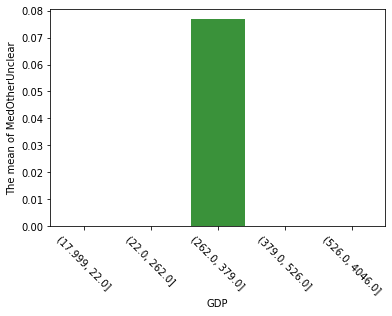

In [81]:
tmp2 = gdp_data.groupby("gdp_bin").MedOtherUnclear.mean().reset_index()
ax1 = sns.barplot(tmp2['gdp_bin'].to_list(),tmp2['MedOtherUnclear'].to_list())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=-45)
ax1.set_xlabel("GDP")
ax1.set_ylabel("The mean of MedOtherUnclear")

In [74]:
tmp2

,gdp_bin,MedCentState
0,"(17.999, 22.0]",0.062500
1,"(22.0, 262.0]",0.153846
2,"(262.0, 379.0]",0.153846
3,"(379.0, 526.0]",0.000000
4,"(526.0, 4046.0]",0.300000
